Just some things I wanted to look at as I was writing the paper...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# to pretty print dataframes
from IPython.display import display

In [2]:
# Raw data
fnotu = '/Users/claire/github/aspiration-analysis/data/clean/rosen.otu_table.clean'
fnmeta = '/Users/claire/github/aspiration-analysis/data/clean/rosen.metadata.clean'

df = pd.read_csv(fnotu, sep='\t', index_col=0)
meta = pd.read_csv(fnmeta, sep='\t', index_col=0)

# JSD
fnjsd = '/Users/claire/github/aspiration-analysis/data/analysis/jsd.txt'
jsd = pd.read_csv(fnjsd, sep='\t').dropna(how='all', axis=1)
jsd = jsd.query('patient_comp == "within"')

# Seed random state
random_state = 12345

/Users/claire/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,9,10,11,12,13,14,15,16,19,20,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


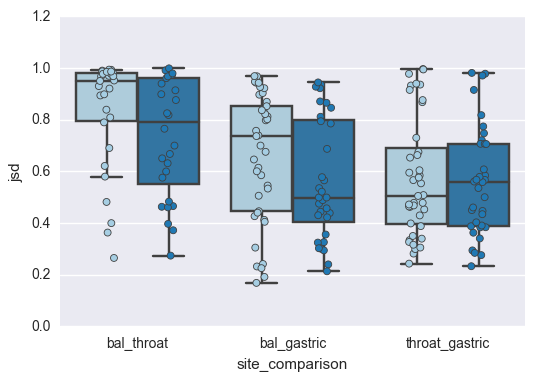

In [7]:
site_comparisons = ['bal_throat', 'bal_gastric', 'throat_gastric']
kwargs = {'palette': 'Paired',
          'hue_order': ['Normal', 'Aspiration/Penetration']}

jsdtoplot = jsd.query('site_comparison == @site_comparisons')\
               .query('patient_comp == "within"')

sns.boxplot(x='site_comparison', y='jsd', data=jsdtoplot,
            order=site_comparisons, hue='mbs_consolidated',
            fliersize=0, **kwargs)
sns.stripplot(x='site_comparison', y='jsd', data=jsdtoplot,
              order=site_comparisons, hue='mbs_consolidated',
              split=True, jitter=True, size=5, linewidth=0.6,
              **kwargs)
plt.legend('')

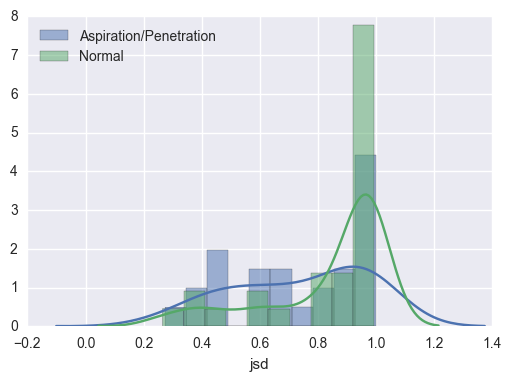

In [14]:
# Just plot a histogram of the bal_throat
jsdtoplot = jsd.query('site_comparison == "bal_throat"')

bins = 10

for asp, subdf in jsdtoplot.groupby('mbs_consolidated'):
    sns.distplot(subdf['jsd'], label=asp, bins=bins, kde=True, hist_kws={'alpha': .5})
plt.legend(loc='upper left')

In [12]:
jsdtoplot.query('jsd > 0.95').groupby('mbs_consolidated').size()

mbs_consolidated
Aspiration/Penetration     8
Normal                    15
dtype: int64